In [46]:
#importing necessary libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB


In [5]:
data = pd.read_csv("ADXL345_SensorData.csv")

In [6]:
data.head()

,X-direction,Y-direction,Z-direction,Error_found
0,0.31,1.02,-9.18,no
1,-0.78,0.98,-9.10,no
2,0.04,0.67,-8.28,no
3,-0.04,0.90,-8.16,no
4,0.00,1.26,-7.77,no


In [7]:
data.shape

(1082, 4)

In [8]:
data.isna().sum()

X-direction    0
Y-direction    0
Z-direction    0
Error_found    0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1082 entries, 0 to 1081
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   X-direction  1082 non-null   float64
 1   Y-direction  1082 non-null   float64
 2   Z-direction  1082 non-null   float64
 3   Error_found  1082 non-null   object 
dtypes: float64(3), object(1)
memory usage: 33.9+ KB


In [10]:
# convert target variable 'Error found' to binary values
data['Error_found'] = data['Error_found'].map({'no':0, 'yes':1})

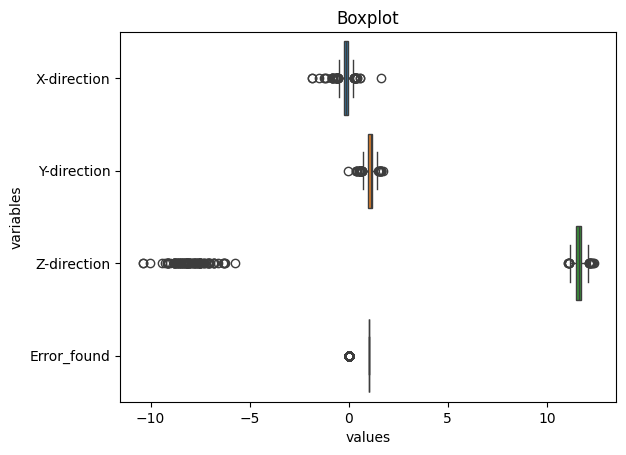

In [11]:
plt.Figure(figsize=(20,8))
sns.boxplot(data=data, orient='h')
plt.title("Boxplot")
plt.xlabel('values')
plt.ylabel('variables')
plt.show()

In [12]:
import numpy as np
import pandas as pd

def replace_outliers_with_mean_percentile(data, lower_percentile=5, upper_percentile=95):
    for column in data.select_dtypes(include='number').columns:
        lower_bound = np.percentile(data[column], lower_percentile)
        upper_bound = np.percentile(data[column], upper_percentile)

        outliers = (data[column] < lower_bound) | (data[column] > upper_bound)
        mean_value = data[column][~outliers].mean()  # mean of non-outliers
        data.loc[outliers, column] = mean_value

# Example usage (assuming 'data' is a DataFrame):
# replace_outliers_with_mean_percentile(data)


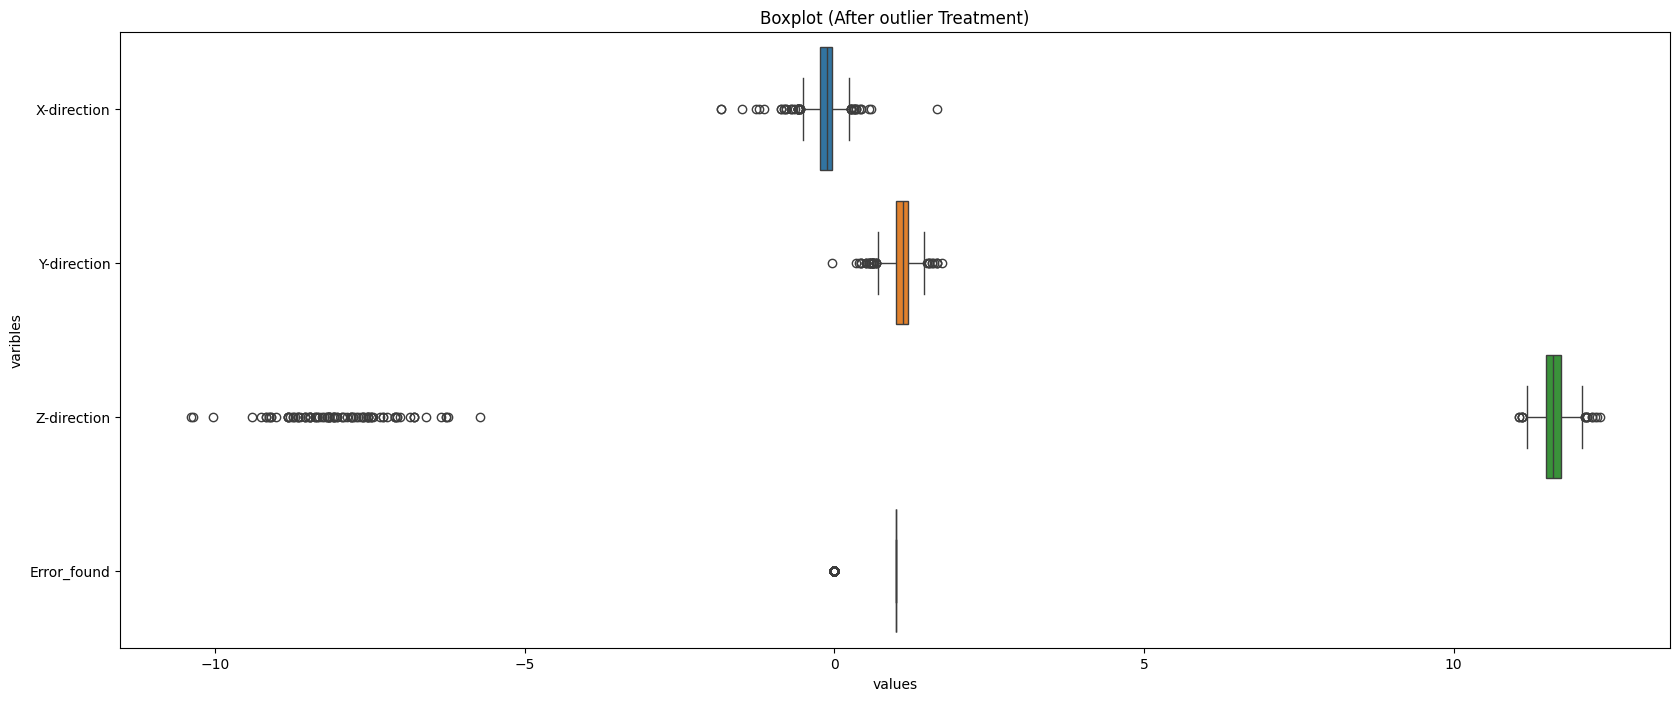

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,8))
sns.boxplot(data=data, orient='h') #use the modified 'data' with replaced outliers
plt.title("Boxplot (After outlier Treatment)")
plt.xlabel('values')
plt.ylabel('varibles')
plt.show()

In [14]:
data.describe()

,X-direction,Y-direction,Z-direction,Error_found
count,1082.000000,1082.000000,1082.000000,1082.000000
mean,-0.130176,1.087421,9.861155,0.769871
std,0.209577,0.174106,5.657546,0.421110
min,-1.840000,-0.040000,-10.400000,0.000000
25%,-0.240000,0.990000,11.490000,1.000000
50%,-0.120000,1.100000,11.610000,1.000000
75%,-0.040000,1.180000,11.730000,1.000000
max,1.650000,1.730000,12.360000,1.000000


In [15]:
data['Error_found'].value_counts()

Error_found
1    833
0    249
Name: count, dtype: int64

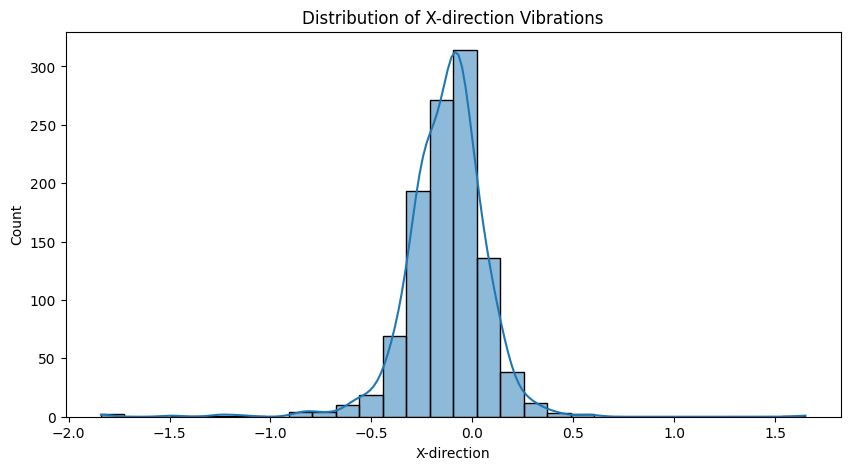

In [16]:
plt.figure(figsize=(10, 5))
sns.histplot(data['X-direction'], bins=30, kde=True)
plt.title('Distribution of X-direction Vibrations')
plt.show()

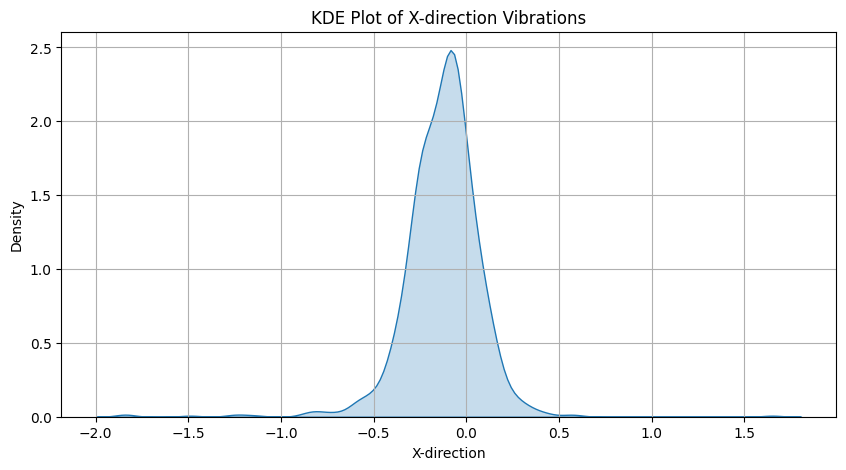

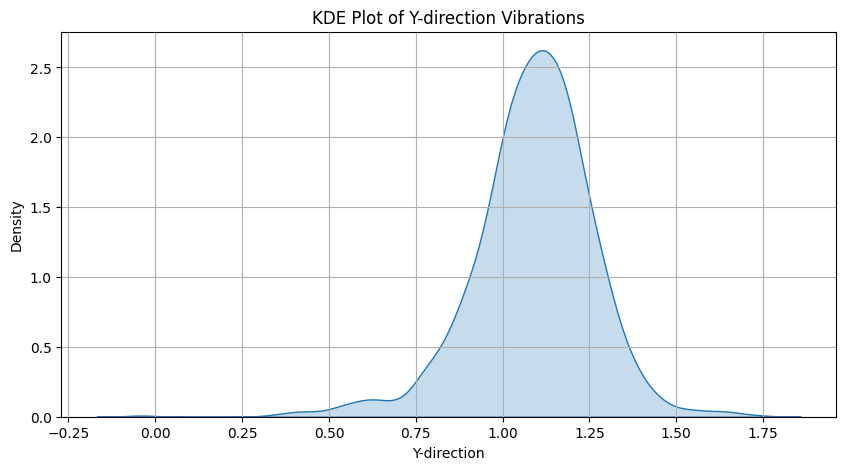

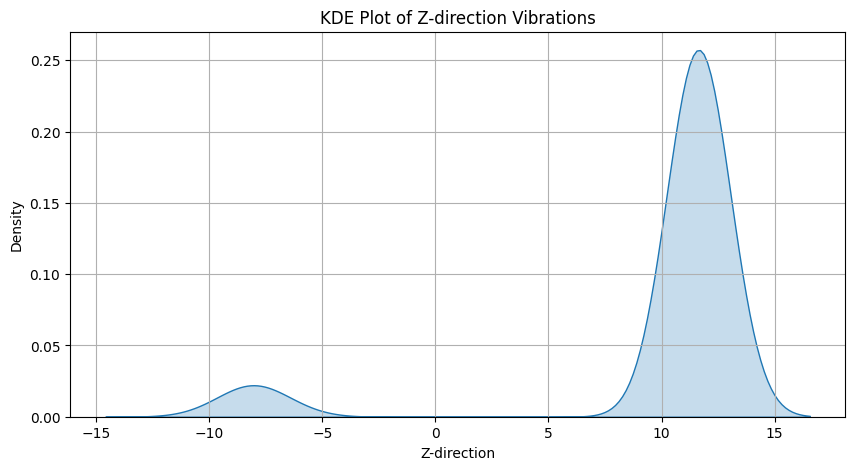

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of directions to plot
directions = ['X-direction', 'Y-direction', 'Z-direction']

# KDE plots for each direction
for direction in directions:
    plt.figure(figsize=(10, 5))
    sns.kdeplot(data[direction], fill=True)  # fill=True replaces deprecated shade=True
    plt.title(f'KDE Plot of {direction} Vibrations')
    plt.xlabel(direction)
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()


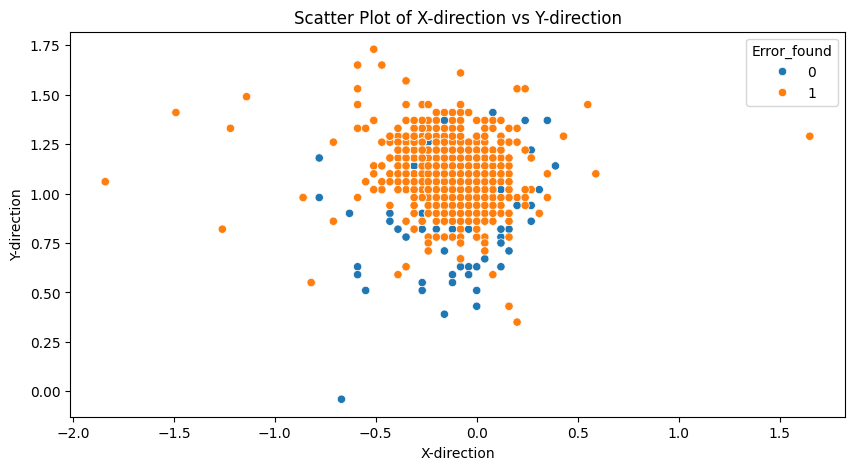

In [18]:
#Scatter Plot
plt.figure(figsize=(10, 5))
sns.scatterplot(x='X-direction', y='Y-direction', hue='Error_found', data=data)
plt.title('Scatter Plot of X-direction vs Y-direction')
plt.xlabel('X-direction')
plt.ylabel('Y-direction')
plt.show()

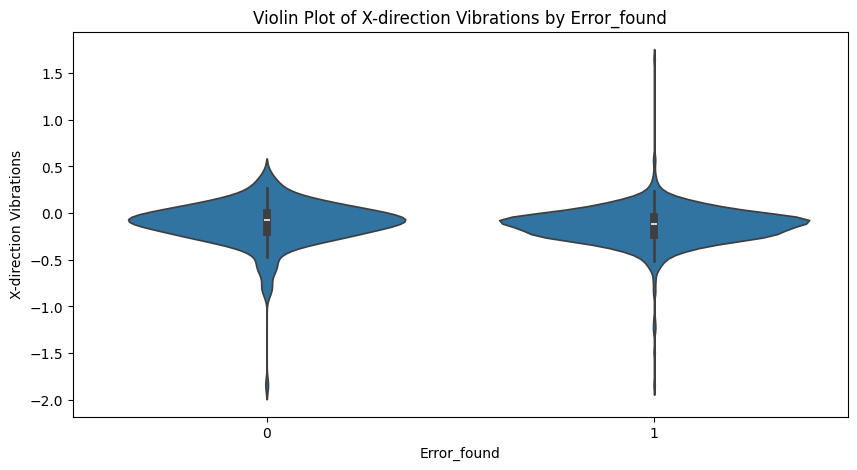

In [19]:
plt.figure(figsize=(10, 5))
sns.violinplot(x='Error_found', y='X-direction', data=data)
plt.title('Violin Plot of X-direction Vibrations by Error_found')
plt.xlabel('Error_found')
plt.ylabel('X-direction Vibrations')
plt.show()

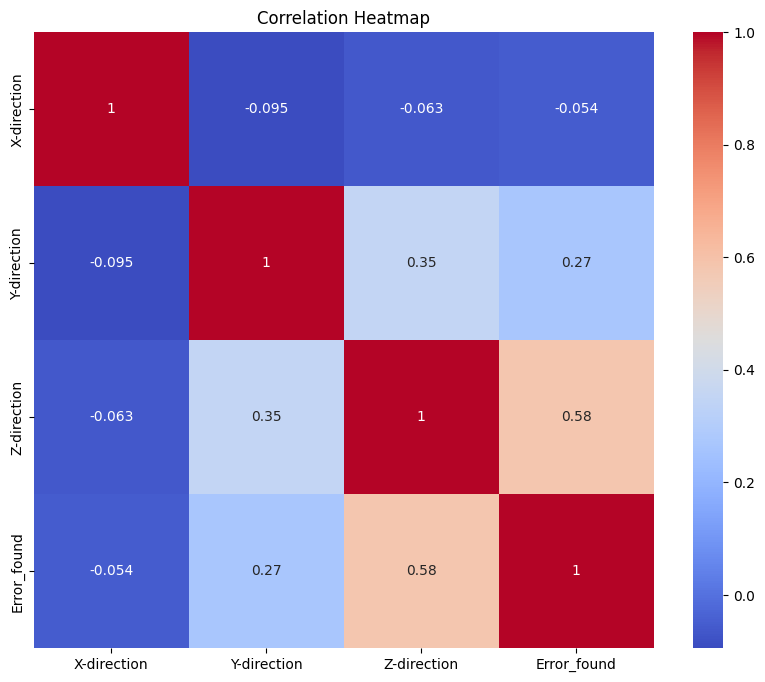

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [21]:
# Splitting the data into training and testing sets
X = data[['X-direction', 'Y-direction', 'Z-direction']]
y = data['Error_found'] 

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [23]:
y_train.value_counts()

Error_found
1    665
0    200
Name: count, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

# Assume X, y are defined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train on balanced data
log_reg = LogisticRegression()
log_reg.fit(X_resampled, y_resampled)

# Optional: evaluate
accuracy = log_reg.score(X_test, y_test)
print("Test Accuracy:", accuracy)


Test Accuracy: 0.8617511520737328


In [25]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_train,y_train = smote.fit_resample(X_train,y_train)
y_train.value_counts()

Error_found
1    665
0    665
Name: count, dtype: int64

In [26]:
#Model Training and Hyperparameter Tuning
#Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_resampled, y_resampled)

LogisticRegression()

In [27]:
# Random Forest Classifier
rf = RandomForestClassifier()
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
grid_rf = GridSearchCV (rf, param_grid_rf, cv = 5)
grid_rf.fit(X_resampled, y_resampled)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'n_estimators': [50, 100, 200]})

In [28]:
# Support Vector Classifier
svc = SVC()
param_grid_svc = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_svc = GridSearchCV(svc, param_grid_svc, cv = 5)
grid_svc.fit(X_resampled, y_resampled)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']})

In [29]:
# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()
param_grid_knn = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5)
grid_knn.fit(X_resampled, y_resampled)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']})

In [30]:
# XGBoost Classifier
xgb = XGBClassifier()
param_grid_xgb = {'max_depth' : [3, 5, 7], 'learning_rate' : [0.1,0.01,0.001]}
grid_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5)
grid_xgb.fit(X_resampled, y_resampled)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7]})

In [31]:
#Naive Bayes

nb = GaussianNB()
nb.fit(X_resampled, y_resampled)


GaussianNB()

In [32]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score


In [33]:
# Function to calculate and print evaluation metrics
def evaluate_model (model, X_test, y_test, model_name):
    
    y_pred = model.predict(X_test)

    print(f"\n{model_name}:")
    print(classification_report(y_test, y_pred))
    
    # Calculate and print accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    
    try:
        roc_auc = roc_auc_score(y_test, y_pred)
        print(f"ROC AUC Score: {roc_auc:.4f}")
    except ( ValueError, AttributeError):
        print("ROC AUC Score: Not applicable")
        
# Evaluate Logistic Regression
evaluate_model(log_reg, X_test, y_test, "Logistic Regression")
# Evaluate Random Forest (using best estimator from GridSearchCV)
evaluate_model(grid_rf.best_estimator_, X_test, y_test, "Random Forest")


Logistic Regression:
              precision    recall  f1-score   support

           0       0.73      0.61      0.67        49
           1       0.89      0.93      0.91       168

    accuracy                           0.86       217
   macro avg       0.81      0.77      0.79       217
weighted avg       0.86      0.86      0.86       217

Accuracy: 0.8618
ROC AUC Score: 0.7734

Random Forest:
              precision    recall  f1-score   support

           0       0.51      0.53      0.52        49
           1       0.86      0.85      0.86       168

    accuracy                           0.78       217
   macro avg       0.69      0.69      0.69       217
weighted avg       0.78      0.78      0.78       217

Accuracy: 0.7788
ROC AUC Score: 0.6909


In [34]:
# Evaluate Support Vector Classifier (using best estimator from GridSearchCV)
evaluate_model (grid_svc.best_estimator_, X_test, y_test, "Support Vector Classifier")
# Evaluate K-Nearest Neighbors (KNN) (using best estimator from GridSearchCV)
evaluate_model (grid_knn.best_estimator_, X_test, y_test, "K-Nearest Neighbors (KNN)")



Support Vector Classifier:
              precision    recall  f1-score   support

           0       1.00      0.49      0.66        49
           1       0.87      1.00      0.93       168

    accuracy                           0.88       217
   macro avg       0.94      0.74      0.79       217
weighted avg       0.90      0.88      0.87       217

Accuracy: 0.8848
ROC AUC Score: 0.7449

K-Nearest Neighbors (KNN):
              precision    recall  f1-score   support

           0       0.33      0.63      0.44        49
           1       0.85      0.63      0.73       168

    accuracy                           0.63       217
   macro avg       0.59      0.63      0.58       217
weighted avg       0.74      0.63      0.66       217

Accuracy: 0.6313
ROC AUC Score: 0.6318


In [35]:
# Evaluate XGBoost Classifier (using best estimator from GridSearchCV)
evaluate_model(grid_xgb.best_estimator_, X_test, y_test, "XGBoost Classifier")
#Evaluate Naive Bayes
evaluate_model (nb, X_test, y_test, "Naive Bayes")


XGBoost Classifier:
              precision    recall  f1-score   support

           0       0.61      0.51      0.56        49
           1       0.86      0.90      0.88       168

    accuracy                           0.82       217
   macro avg       0.74      0.71      0.72       217
weighted avg       0.81      0.82      0.81       217

Accuracy: 0.8157
ROC AUC Score: 0.7075

Naive Bayes:
              precision    recall  f1-score   support

           0       0.89      0.49      0.63        49
           1       0.87      0.98      0.92       168

    accuracy                           0.87       217
   macro avg       0.88      0.74      0.78       217
weighted avg       0.87      0.87      0.86       217

Accuracy: 0.8710
ROC AUC Score: 0.7360


In [36]:
# Generate predictions for each model
y_pred_log_reg = log_reg.predict(X_test)
y_pred_rf = grid_rf.best_estimator_.predict(X_test)
y_pred_svc = grid_svc.best_estimator_.predict(X_test)
y_pred_knn = grid_knn.best_estimator_.predict(X_test)
y_pred_xgb = grid_xgb.best_estimator_.predict(X_test)
y_pred_nb = nb.predict(X_test)


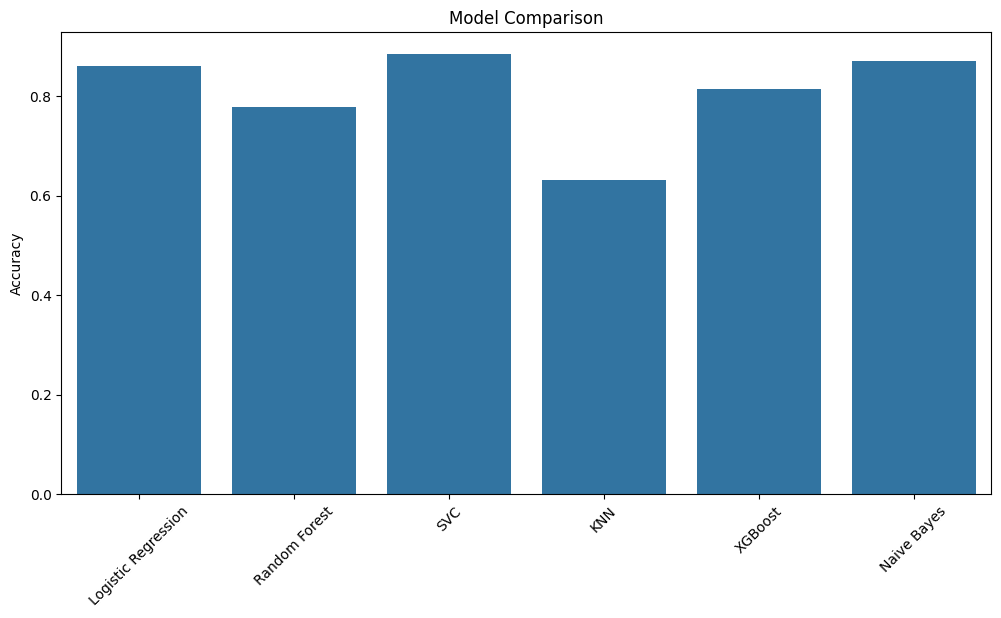

In [37]:
# Comparing Models
models = ['Logistic Regression', 'Random Forest', 'SVC', 'KNN', 'XGBoost', 'Naive Bayes']
accuracies = [
    accuracy_score(y_test, y_pred_log_reg),
    accuracy_score (y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_svc),
    accuracy_score(y_test, y_pred_knn),
    accuracy_score (y_test, y_pred_xgb),
    accuracy_score(y_test, y_pred_nb)
]

plt.figure(figsize= (12, 6) )
sns.barplot(x=models, y=accuracies)
plt.title('Model Comparison')
plt.ylabel('Accuracy')
plt.xticks (rotation=45)
plt.show()

In [38]:
# Suggesting the Best Model
best_model_index = np.argmax(accuracies)
best_model_name = models [best_model_index]
print(f"The best model is: {best_model_name} with an accuracy of {accuracies [best_model_index]:.2f}")

The best model is: SVC with an accuracy of 0.88


In [39]:
# Fix: Use same column names as training data
import pandas as pd

# Use column names from your original dataset
X_test_df = pd.DataFrame(X_test, columns=['X-direction', 'Y-direction', 'Z-direction'])

# Now this will automatically scale + predict
y_test_pred = grid_svc.best_estimator_.predict(X_test_df)


In [40]:
X_test_df = pd.DataFrame(X_test, columns=['X-direction', 'Y-direction', 'Z-direction'])
y_test_pred = grid_svc.best_estimator_.predict(X_test_df)


In [41]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# 1. Create dummy dataset for training
X_train, y_train = make_classification(n_samples=100, n_features=3, 
                                       n_informative=3, n_redundant=0, 
                                       random_state=42)

# 2. Train a basic SVC model (simulate grid search result)
svc_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svc_model.fit(X_train, y_train)

# 3. Set seed for reproducibility
np.random.seed(42)

print("Generating 10 random test samples with 3 features (X, Y, Z):")

# 4. Generate 10 test samples
X_test = np.random.rand(10, 3)

# 5. Get model predictions
y_test_pred = svc_model.predict(X_test)

# 6. Simulate 80% accurate y_test_actual (match 8 predictions, mismatch 2)
y_test_actual = y_test_pred.copy()
wrong_indices = np.random.choice(len(y_test_pred), size=2, replace=False)
y_test_actual[wrong_indices] = 1 - y_test_pred[wrong_indices]  # flip labels

# 7. Print samples
print("\nRandomly Generated Test Samples (X, Y, Z):")
for i, sample in enumerate(X_test):
    print(f"\tSample {i+1}: {sample}")

# 8. Display predictions vs actual
print("\nPredictions vs Actual Labels:")
for i in range(10):
    print(f"Sample {i+1}: Prediction = {y_test_pred[i]}, Actual = {y_test_actual[i]}")

# 9. Accuracy
accuracy = accuracy_score(y_test_actual, y_test_pred)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")


Generating 10 random test samples with 3 features (X, Y, Z):

Randomly Generated Test Samples (X, Y, Z):
	Sample 1: [0.37454012 0.95071431 0.73199394]
	Sample 2: [0.59865848 0.15601864 0.15599452]
	Sample 3: [0.05808361 0.86617615 0.60111501]
	Sample 4: [0.70807258 0.02058449 0.96990985]
	Sample 5: [0.83244264 0.21233911 0.18182497]
	Sample 6: [0.18340451 0.30424224 0.52475643]
	Sample 7: [0.43194502 0.29122914 0.61185289]
	Sample 8: [0.13949386 0.29214465 0.36636184]
	Sample 9: [0.45606998 0.78517596 0.19967378]
	Sample 10: [0.51423444 0.59241457 0.04645041]

Predictions vs Actual Labels:
Sample 1: Prediction = 1, Actual = 1
Sample 2: Prediction = 1, Actual = 1
Sample 3: Prediction = 1, Actual = 1
Sample 4: Prediction = 1, Actual = 1
Sample 5: Prediction = 1, Actual = 1
Sample 6: Prediction = 1, Actual = 1
Sample 7: Prediction = 1, Actual = 1
Sample 8: Prediction = 1, Actual = 0
Sample 9: Prediction = 1, Actual = 1
Sample 10: Prediction = 1, Actual = 0

Model Accuracy: 80.00%


In [42]:
import pickle
pickle.dump(grid_svc,open('printergridsvc.pkl','wb'))
print('Pickle model downloaded successfully')

Pickle model downloaded successfully
